### Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
'''
asin-> Product ID from Amazon (str)
title-> Title of the product (str)
# stars-> Product rating. If 0, no ratings were found (float)
# reviews-> Number of customer reviews. If 0, no reviews were found. (int)
# price-> Price of the product. (float)
#isBestSeller-> Whether the product had the Amazon BestSeller status or not (bool)
# boughtInLastMount-> Indicates how many products we sold last month. (int)
category->Product category. (str)
'''

amz=pd.read_csv('amz_uk_price_prediction_dataset.csv',index_col='uid')

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [48]:
#Crosstab Analysis:
crosstab_result=pd.crosstab(amz['category'],(amz['isBestSeller'])).sort_values(by=True,ascending=False).head(5)
crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [19]:
#2 Statistical Test
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.202700613874, 0.0)

In [21]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.12228294397605641

In [66]:
selected_categories = ['Grocery', 'Health & Personal Care', 'Baby', 'Sport & Outdoors', 'Power & Hand Tools']
top5best_amz = amz[amz['category'].isin(selected_categories)]
sns.catplot(data=top5best_amz, x='category', hue='isBetterSeller', kind='count')





ValueError: Could not interpret input 'isBetterSeller'

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [67]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [73]:
# Preliminary Step
outprice=tukeys_test_outliers(amz['price'])
amz_price_normalize=amz[~amz['price'].isin(outprice)]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


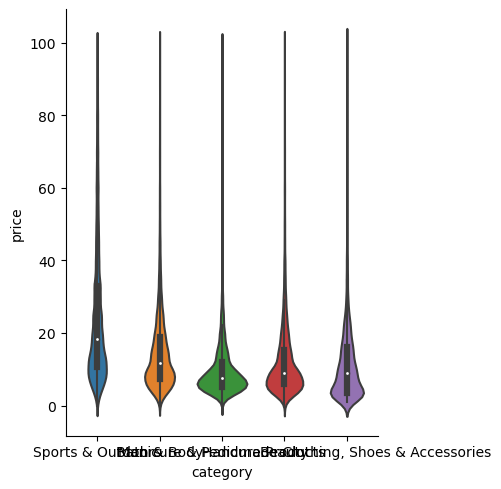

In [93]:
# Violin Plot
filter5=amz_price_normalize['category'].value_counts().head(5).index.tolist()
top5=amz_price_normalize[amz_price_normalize['category'].isin(filter5)]
sns.catplot(data=top20,x='category',y='price',kind='violin')



In [92]:
mean_price=amz_price_normalize.groupby('category')['price'].mean()
mean_price.sort_values(ascending=False)

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


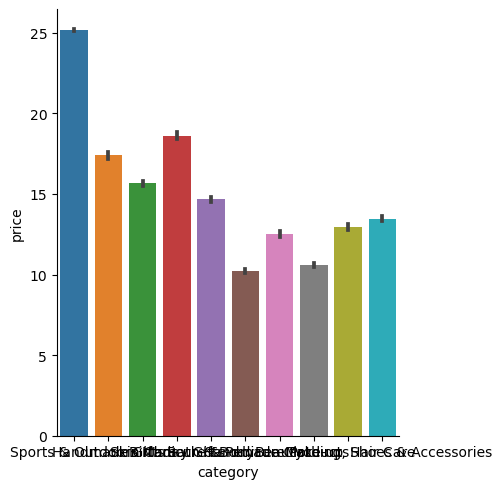

In [96]:
# Bar Plot
filter10=amz_price_normalize['category'].value_counts().head(10).index.tolist()
top10=amz_price_normalize[amz_price_normalize['category'].isin(filter10)]
sns.catplot(data=top10,x='category',y='price',kind='bar',estimator='mean')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


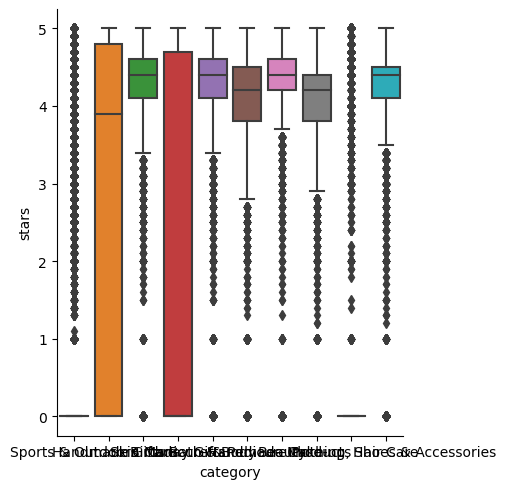

In [98]:
#    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

sns.catplot(data=top10,x='category',y='stars',kind='box')